## <font color=blue>Diabetes dataset age 30-50<font>

[Baseline Categorical](#SVM)

[One Hot](#hot)

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, \
f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC, SVC
from tqdm import tqdm

In [2]:
def plot_confusion(clf, title, X_test, y_test):
    svm_predicted_mc = clf.predict(X_test)
    confusion_mc = confusion_matrix(y_test, svm_predicted_mc)
    df_cm = pd.DataFrame(confusion_mc, 
                         index = [i for i in range(0,3)], columns = [i for i in range(0,3)])

    plt.figure(figsize=(6,4))
    ax_ticks= ['<30', '>30', 'NO']
    sns.heatmap(df_cm, annot=True, xticklabels=ax_ticks, yticklabels=ax_ticks, fmt='g')
    plt.title(title + '\nAccuracy:{0:.3f}'.format(accuracy_score(y_test, 
                                                                           svm_predicted_mc)))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    print('Micro-averaged precision = {:.2f} (treat instances equally)'
      .format(precision_score(y_test, svm_predicted_mc, average = 'micro')))
    print('Macro-averaged precision = {:.2f} (treat classes equally)'
      .format(precision_score(y_test, svm_predicted_mc, average = 'macro')))
    print('Micro-averaged f1 = {:.2f} (treat instances equally)'
          .format(f1_score(y_test, svm_predicted_mc, average = 'micro')))
    print('Macro-averaged f1 = {:.2f} (treat classes equally)'
          .format(f1_score(y_test, svm_predicted_mc, average = 'macro')))
    print(classification_report(y_test, svm_predicted_mc, target_names=ax_ticks))

In [3]:
df = pd.read_csv("diabetic_data.csv", dtype='category').iloc[:,2:]
df.shape

(101766, 48)

In [4]:
df['age'].head(2)

0     [0-10)
1    [10-20)
Name: age, dtype: category
Categories (10, object): [[0-10), [10-20), [20-30), [30-40), ..., [60-70), [70-80), [80-90), [90-100)]

In [5]:
df = df.loc[(df['age'] == '[30-40)') | (df['age'] == '[40-50)') ]

In [6]:
df.head(2)

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
3,Caucasian,Male,[30-40),?,1,1,7,2,?,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),?,1,1,7,1,?,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [7]:
df.describe()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,13460,13460,13460,13460,13460,13460,13460,13460,13460,13460,...,13460,13460,13460,13460,13460,13460,13460,13460,13460,13460
unique,6,2,2,10,8,20,12,14,17,54,...,1,4,3,2,1,1,1,2,2,3
top,Caucasian,Female,[40-50),?,1,1,7,2,?,?,...,No,No,No,No,No,No,No,No,Yes,NO
freq,8334,6973,9685,13144,7330,10529,7863,2815,5823,6196,...,13460,5599,13372,13458,13460,13460,13460,6960,10254,7544


In [8]:
def show_unique(dataF):
    for c in dataF.columns:
        print(c, dataF[c].unique())
        print('*'*50)

show_unique(df)

race [Caucasian, AfricanAmerican, ?, Hispanic, Other, Asian]
Categories (6, object): [Caucasian, AfricanAmerican, ?, Hispanic, Other, Asian]
**************************************************
gender [Male, Female]
Categories (2, object): [Male, Female]
**************************************************
age [[30-40), [40-50)]
Categories (2, object): [[30-40), [40-50)]
**************************************************
weight [?, [75-100), [0-25), [50-75), [100-125), [125-150), >200, [25-50), [150-175), [175-200)]
Categories (10, object): [?, [75-100), [0-25), [50-75), ..., >200, [25-50), [150-175), [175-200)]
**************************************************
admission_type_id [1, 2, 3, 6, 5, 8, 4, 7]
Categories (8, object): [1, 2, 3, 6, 5, 8, 4, 7]
**************************************************
discharge_disposition_id [1, 3, 6, 25, 2, ..., 22, 13, 15, 28, 9]
Length: 20
Categories (20, object): [1, 3, 6, 25, ..., 13, 15, 28, 9]
**************************************************
adm

### <font color =blue>1. remove columns with missing data</font>

In [9]:
df = df.drop(columns=['weight', 'payer_code', 'medical_specialty'])
df.head(2)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


### <font color=blue> 2. remove incomplete columns and rows </font>

In [10]:
# drop missing values
df = df.replace('?', np.nan)
df = df.replace('Unknown/Invalid', np.nan)
df = df.dropna()
df.shape

(12813, 45)

In [11]:
df = df.drop(columns= df.columns[df.nunique() == 1])

In [12]:
show_unique(df)

race [Caucasian, AfricanAmerican, Hispanic, Other, Asian]
Categories (5, object): [Caucasian, AfricanAmerican, Hispanic, Other, Asian]
**************************************************
gender [Male, Female]
Categories (2, object): [Male, Female]
**************************************************
age [[30-40), [40-50)]
Categories (2, object): [[30-40), [40-50)]
**************************************************
admission_type_id [1, 2, 3, 6, 5, 8, 4, 7]
Categories (8, object): [1, 2, 3, 6, 5, 8, 4, 7]
**************************************************
discharge_disposition_id [1, 3, 6, 25, 2, ..., 22, 13, 15, 28, 9]
Length: 20
Categories (20, object): [1, 3, 6, 25, ..., 13, 15, 28, 9]
**************************************************
admission_source_id [7, 2, 4, 1, 6, ..., 8, 3, 5, 9, 10]
Length: 12
Categories (12, object): [7, 2, 4, 1, ..., 3, 5, 9, 10]
**************************************************
time_in_hospital [2, 1, 9, 7, 8, ..., 14, 5, 13, 10, 12]
Length: 14
Categories (

### <font color = blue>3. categorical variables</font>

In [13]:
to_num = ['time_in_hospital', 'num_lab_procedures', 'num_procedures',
         'num_medications', 'number_outpatient', 'number_emergency',
         'number_inpatient', 'number_diagnoses']

to_cat_codes = list(set(df.columns) - set(to_num))

In [14]:
X_features = list(to_num)
for c in to_cat_codes:
    df[c+'_cat'] = df[c].cat.codes        
    X_features += [c+'_cat']
    
X_features.remove('readmitted_cat')
X_features

['time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses',
 'repaglinide_cat',
 'max_glu_serum_cat',
 'change_cat',
 'age_cat',
 'diag_3_cat',
 'miglitol_cat',
 'A1Cresult_cat',
 'diabetesMed_cat',
 'diag_2_cat',
 'tolazamide_cat',
 'glyburide_cat',
 'gender_cat',
 'insulin_cat',
 'race_cat',
 'admission_source_id_cat',
 'admission_type_id_cat',
 'diag_1_cat',
 'glipizide_cat',
 'glyburide-metformin_cat',
 'glimepiride_cat',
 'acarbose_cat',
 'metformin_cat',
 'nateglinide_cat',
 'pioglitazone_cat',
 'chlorpropamide_cat',
 'glipizide-metformin_cat',
 'rosiglitazone_cat',
 'discharge_disposition_id_cat',
 'troglitazone_cat']

In [15]:
df['readmitted'].head(11)

3      NO
4      NO
10    >30
12    <30
41    >30
45     NO
52    >30
57     NO
62    >30
85    >30
86    >30
Name: readmitted, dtype: category
Categories (3, object): [<30, >30, NO]

In [16]:
df['readmitted_cat'].head(11)

3     2
4     2
10    1
12    0
41    1
45    2
52    1
57    2
62    1
85    1
86    1
Name: readmitted_cat, dtype: int8

#### <font color=red>Target Mapping: < 30 = 0, >30 = 1, NO = 2, </font>

### <font color=blue>4. split</font>

In [17]:
for n in to_num:
    df[n] = df[n].astype('int')

df[to_num].dtypes

time_in_hospital      int64
num_lab_procedures    int64
num_procedures        int64
num_medications       int64
number_outpatient     int64
number_emergency      int64
number_inpatient      int64
number_diagnoses      int64
dtype: object

## <font color=green>to Categorical</font>

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    df[X_features], df['readmitted_cat'] , random_state = 0)

In [19]:
X_train.head(2)

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,repaglinide_cat,max_glu_serum_cat,...,glimepiride_cat,acarbose_cat,metformin_cat,nateglinide_cat,pioglitazone_cat,chlorpropamide_cat,glipizide-metformin_cat,rosiglitazone_cat,discharge_disposition_id_cat,troglitazone_cat
15643,8,69,0,22,0,0,2,3,1,2,...,1,0,1,0,1,1,0,3,0,0
55466,3,63,1,15,2,0,3,7,1,2,...,1,0,1,0,1,1,0,1,0,0


In [20]:
y_train.head(2)

15643    1
55466    1
Name: readmitted_cat, dtype: int8

In [21]:
X_test.head(2)

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,repaglinide_cat,max_glu_serum_cat,...,glimepiride_cat,acarbose_cat,metformin_cat,nateglinide_cat,pioglitazone_cat,chlorpropamide_cat,glipizide-metformin_cat,rosiglitazone_cat,discharge_disposition_id_cat,troglitazone_cat
10530,4,61,1,7,0,0,1,7,1,2,...,1,0,2,0,1,1,0,1,8,0
76240,2,38,0,11,0,0,0,9,1,2,...,1,0,1,0,1,1,0,1,0,0


In [22]:
y_test.head(2)

10530    2
76240    2
Name: readmitted_cat, dtype: int8

### <font color=green>min max scaling</font>

In [23]:
X_train.dtypes

time_in_hospital                int64
num_lab_procedures              int64
num_procedures                  int64
num_medications                 int64
number_outpatient               int64
number_emergency                int64
number_inpatient                int64
number_diagnoses                int64
repaglinide_cat                  int8
max_glu_serum_cat                int8
change_cat                       int8
age_cat                          int8
diag_3_cat                      int16
miglitol_cat                     int8
A1Cresult_cat                    int8
diabetesMed_cat                  int8
diag_2_cat                      int16
tolazamide_cat                   int8
glyburide_cat                    int8
gender_cat                       int8
insulin_cat                      int8
race_cat                         int8
admission_source_id_cat          int8
admission_type_id_cat            int8
diag_1_cat                      int16
glipizide_cat                    int8
glyburide-me

### <font color=green>before scale</font>

In [24]:
X_train.describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,repaglinide_cat,max_glu_serum_cat,...,glimepiride_cat,acarbose_cat,metformin_cat,nateglinide_cat,pioglitazone_cat,chlorpropamide_cat,glipizide-metformin_cat,rosiglitazone_cat,discharge_disposition_id_cat,troglitazone_cat
count,9609.000000,9609.000000,9609.000000,9609.000000,9609.000000,9609.000000,9609.000000,9609.000000,9609.000000,9609.000000,...,9609.000000,9609.000000,9609.000000,9609.000000,9609.000000,9609.000000,9609.000000,9609.000000,9609.000000,9609.0
mean,4.008950,42.990009,1.302113,15.209387,0.318764,0.405661,0.755646,6.955562,1.006556,1.981163,...,1.041107,0.002081,1.229889,0.005932,1.061817,1.000312,0.000104,1.056926,2.821105,0.0
std,2.842911,20.197106,1.634160,7.913883,1.206276,1.528685,1.556468,1.990089,0.088108,0.289921,...,0.216599,0.047806,0.467866,0.082037,0.253879,0.017668,0.010201,0.242253,5.660344,0.0
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0
25%,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,5.000000,1.000000,2.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.0
50%,3.000000,44.000000,1.000000,14.000000,0.000000,0.000000,0.000000,7.000000,1.000000,2.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.0
75%,5.000000,57.000000,2.000000,19.000000,0.000000,0.000000,1.000000,9.000000,1.000000,2.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.0
max,14.000000,109.000000,6.000000,68.000000,37.000000,37.000000,19.000000,16.000000,3.000000,3.000000,...,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,1.000000,3.000000,24.000000,0.0


In [25]:
X_test.describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,repaglinide_cat,max_glu_serum_cat,...,glimepiride_cat,acarbose_cat,metformin_cat,nateglinide_cat,pioglitazone_cat,chlorpropamide_cat,glipizide-metformin_cat,rosiglitazone_cat,discharge_disposition_id_cat,troglitazone_cat
count,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,...,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000
mean,4.017166,43.117353,1.276529,15.175718,0.351748,0.409800,0.754994,6.961298,1.004994,1.980649,...,1.033084,0.002185,1.234082,0.005618,1.063046,1.000312,0.000312,1.053371,3.032147,0.000312
std,2.890015,20.354859,1.656687,7.975925,1.385733,1.730782,1.537609,2.006172,0.078862,0.270751,...,0.195559,0.052963,0.471623,0.086379,0.254381,0.017667,0.017667,0.238290,5.832496,0.017667
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,5.000000,1.000000,2.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,3.000000,44.000000,1.000000,14.000000,0.000000,0.000000,0.000000,7.000000,1.000000,2.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,5.000000,57.000000,2.000000,19.000000,0.000000,0.000000,1.000000,9.000000,1.000000,2.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,14.000000,120.000000,6.000000,61.000000,36.000000,42.000000,14.000000,16.000000,3.000000,3.000000,...,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,1.000000,3.000000,24.000000,1.000000


In [26]:
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_features)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_features)

### <font color=green>after scale</font>

In [27]:
X_train.iloc[:,:20].describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,repaglinide_cat,max_glu_serum_cat,change_cat,age_cat,diag_3_cat,miglitol_cat,A1Cresult_cat,diabetesMed_cat,diag_2_cat,tolazamide_cat,glyburide_cat,gender_cat
count,9609.000000,9609.000000,9609.000000,9609.000000,9609.000000,9609.000000,9609.000000,9609.000000,9609.000000,9609.000000,9609.000000,9609.000000,9609.000000,9609.000000,9609.000000,9609.000000,9609.000000,9609.000000,9609.000000,9609.000000
mean,0.231458,0.388796,0.217019,0.212080,0.008615,0.010964,0.039771,0.304274,0.003278,0.660388,0.519305,0.718909,0.252733,0.000104,0.617962,0.760537,0.267964,0.000312,0.354563,0.483193
std,0.218685,0.187010,0.272360,0.118118,0.032602,0.041316,0.081919,0.153084,0.044054,0.096640,0.499653,0.449555,0.189230,0.010201,0.183725,0.426778,0.177474,0.017668,0.091187,0.499743
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.076923,0.277778,0.000000,0.134328,0.000000,0.000000,0.000000,0.153846,0.000000,0.666667,0.000000,0.000000,0.107868,0.000000,0.666667,1.000000,0.124309,0.000000,0.333333,0.000000
50%,0.153846,0.398148,0.166667,0.194030,0.000000,0.000000,0.000000,0.307692,0.000000,0.666667,1.000000,1.000000,0.217005,0.000000,0.666667,1.000000,0.241713,0.000000,0.333333,0.000000
75%,0.307692,0.518519,0.333333,0.268657,0.000000,0.000000,0.052632,0.461538,0.000000,0.666667,1.000000,1.000000,0.370558,0.000000,0.666667,1.000000,0.390884,0.000000,0.333333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
X_train.iloc[:,21:40].describe()

,race_cat,admission_source_id_cat,admission_type_id_cat,diag_1_cat,glipizide_cat,glyburide-metformin_cat,glimepiride_cat,acarbose_cat,metformin_cat,nateglinide_cat,pioglitazone_cat,chlorpropamide_cat,glipizide-metformin_cat,rosiglitazone_cat,discharge_disposition_id_cat,troglitazone_cat
count,9609.000000,9609.000000,9609.000000,9609.000000,9609.000000,9609.000000,9609.000000,9609.000000,9609.000000,9609.000000,9609.000000,9609.000000,9609.000000,9609.000000,9609.000000,9609.0
mean,0.363669,0.509741,0.143110,0.353717,0.366115,0.006348,0.347036,0.001041,0.409963,0.001977,0.353939,0.000312,0.000104,0.352309,0.117546,0.0
std,0.254724,0.368906,0.206795,0.189737,0.111553,0.079427,0.072200,0.023903,0.155955,0.027346,0.084626,0.017668,0.010201,0.080751,0.235848,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.176056,0.333333,0.000000,0.333333,0.000000,0.333333,0.000000,0.333333,0.000000,0.000000,0.333333,0.000000,0.0
50%,0.500000,0.800000,0.000000,0.347887,0.333333,0.000000,0.333333,0.000000,0.333333,0.000000,0.333333,0.000000,0.000000,0.333333,0.000000,0.0
75%,0.500000,0.800000,0.285714,0.512676,0.333333,0.000000,0.333333,0.000000,0.333333,0.000000,0.333333,0.000000,0.000000,0.333333,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [29]:
y_train.describe()

count    9609.000000
mean        1.439796
std         0.684628
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: readmitted_cat, dtype: float64

In [30]:
X_test.shape

(3204, 37)

In [31]:
X_test.iloc[:,:20].describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,repaglinide_cat,max_glu_serum_cat,change_cat,age_cat,diag_3_cat,miglitol_cat,A1Cresult_cat,diabetesMed_cat,diag_2_cat,tolazamide_cat,glyburide_cat,gender_cat
count,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.0,3204.000000,3204.000000,3204.000000,3204.0,3204.000000,3204.000000
mean,0.232090,0.389975,0.212755,0.211578,0.009507,0.011076,0.039737,0.304715,0.002497,0.660216,0.513109,0.735643,0.252387,0.0,0.620995,0.763109,0.264839,0.0,0.355181,0.470037
std,0.222309,0.188471,0.276115,0.119044,0.037452,0.046778,0.080927,0.154321,0.039431,0.090250,0.499906,0.441059,0.187127,0.0,0.185023,0.425241,0.176286,0.0,0.092046,0.499179
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.500000,0.000000,0.000000,0.000000,0.001269,0.0,0.000000,0.000000,0.002762,0.0,0.000000,0.000000
25%,0.076923,0.277778,0.000000,0.134328,0.000000,0.000000,0.000000,0.153846,0.000000,0.666667,0.000000,0.000000,0.107868,0.0,0.666667,1.000000,0.124309,0.0,0.333333,0.000000
50%,0.153846,0.398148,0.166667,0.194030,0.000000,0.000000,0.000000,0.307692,0.000000,0.666667,1.000000,1.000000,0.217005,0.0,0.666667,1.000000,0.240331,0.0,0.333333,0.000000
75%,0.307692,0.518519,0.333333,0.268657,0.000000,0.000000,0.052632,0.461538,0.000000,0.666667,1.000000,1.000000,0.370558,0.0,0.666667,1.000000,0.390884,0.0,0.333333,1.000000
max,1.000000,1.101852,1.000000,0.895522,0.972973,1.135135,0.736842,1.000000,1.000000,1.000000,1.000000,1.000000,0.993655,0.0,1.000000,1.000000,0.998619,0.0,1.000000,1.000000


In [32]:
X_test.iloc[:,21:40].describe()

,race_cat,admission_source_id_cat,admission_type_id_cat,diag_1_cat,glipizide_cat,glyburide-metformin_cat,glimepiride_cat,acarbose_cat,metformin_cat,nateglinide_cat,pioglitazone_cat,chlorpropamide_cat,glipizide-metformin_cat,rosiglitazone_cat,discharge_disposition_id_cat,troglitazone_cat
count,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000
mean,0.368290,0.517509,0.139513,0.355778,0.368290,0.005306,0.344361,0.001092,0.411361,0.001873,0.354349,0.000312,0.000312,0.351124,0.126339,0.000312
std,0.258431,0.367713,0.204744,0.189332,0.114626,0.076836,0.065186,0.026482,0.157208,0.028793,0.084794,0.017667,0.017667,0.079430,0.243021,0.017667
min,0.000000,0.000000,0.000000,0.001408,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.177465,0.333333,0.000000,0.333333,0.000000,0.333333,0.000000,0.333333,0.000000,0.000000,0.333333,0.000000,0.000000
50%,0.500000,0.800000,0.000000,0.347887,0.333333,0.000000,0.333333,0.000000,0.333333,0.000000,0.333333,0.000000,0.000000,0.333333,0.000000,0.000000
75%,0.500000,0.800000,0.285714,0.512676,0.333333,0.000000,0.333333,0.000000,0.333333,0.000000,0.333333,0.000000,0.000000,0.333333,0.000000,0.000000
max,1.000000,1.100000,0.857143,0.966197,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
y_test.describe()

count    3204.000000
mean        1.449438
std         0.678102
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: readmitted_cat, dtype: float64

<a id='SVM'></a>

### <font color=green>Baseline Categorical</font>

In [34]:
%%time
from sklearn.dummy import DummyClassifier

d_major = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)

print('train accuracy: {:.2f}'.format(d_major.score(X_train, y_train)))
print('test accuracy: {:.2f}'.format(d_major.score(X_test, y_test)))

train accuracy: 0.55
test accuracy: 0.56
CPU times: user 2.69 ms, sys: 135 µs, total: 2.82 ms
Wall time: 2.37 ms


<IPython.core.display.Javascript object>


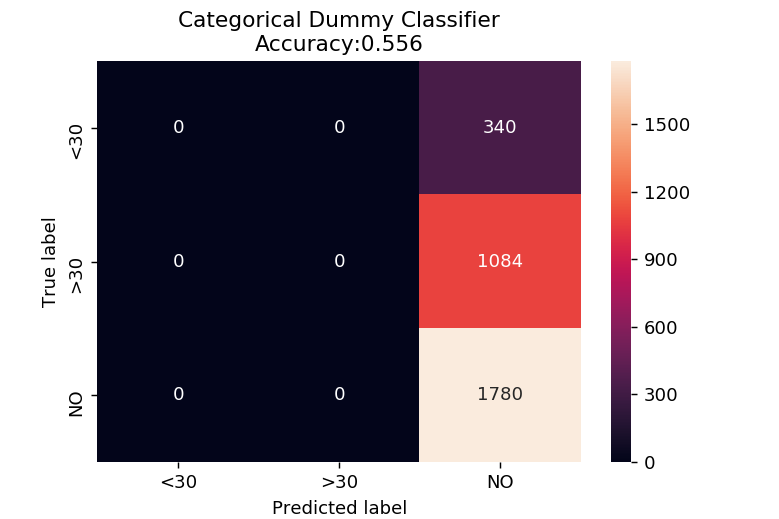

Micro-averaged precision = 0.56 (treat instances equally)
Macro-averaged precision = 0.19 (treat classes equally)
Micro-averaged f1 = 0.56 (treat instances equally)
Macro-averaged f1 = 0.24 (treat classes equally)
             precision    recall  f1-score   support

        <30       0.00      0.00      0.00       340
        >30       0.00      0.00      0.00      1084
         NO       0.56      1.00      0.71      1780

avg / total       0.31      0.56      0.40      3204



/home/lam/anaconda2/envs/my_env3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lam/anaconda2/envs/my_env3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lam/anaconda2/envs/my_env3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [35]:
plot_confusion(d_major, 'Categorical Dummy Classifier', X_test, y_test)

[LibLinear]training accuracy: 0.60
test accuracy: 0.61


<IPython.core.display.Javascript object>


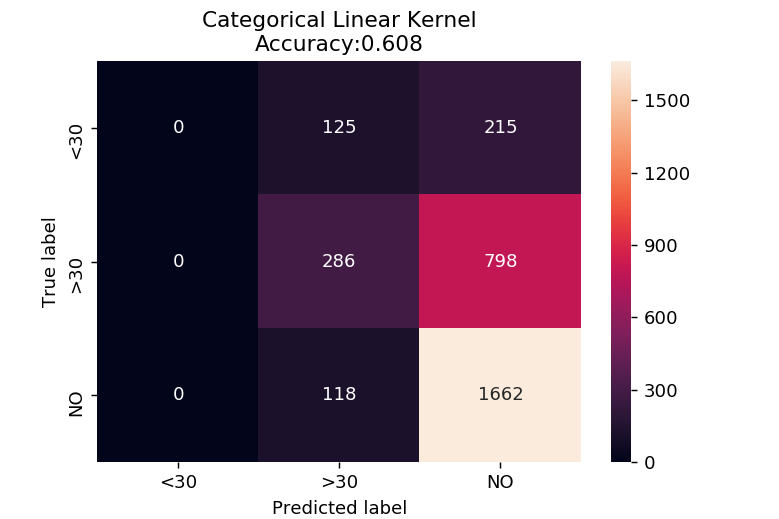

Micro-averaged precision = 0.61 (treat instances equally)
Macro-averaged precision = 0.39 (treat classes equally)
Micro-averaged f1 = 0.61 (treat instances equally)
Macro-averaged f1 = 0.37 (treat classes equally)
             precision    recall  f1-score   support

        <30       0.00      0.00      0.00       340
        >30       0.54      0.26      0.35      1084
         NO       0.62      0.93      0.75      1780

avg / total       0.53      0.61      0.53      3204

CPU times: user 840 ms, sys: 0 ns, total: 840 ms
Wall time: 671 ms


/home/lam/anaconda2/envs/my_env3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lam/anaconda2/envs/my_env3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lam/anaconda2/envs/my_env3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [36]:
%%time
clf = LinearSVC(verbose=True).fit(X_train, y_train)

print('training accuracy: {:.2f}'.format(clf.score(X_train, y_train)))
print('test accuracy: {:.2f}'.format(clf.score(X_test, y_test)))
plot_confusion(clf, 'Categorical Linear Kernel', X_test, y_test)

### <font color=green>SVM optimise over accuracy</font>

In [37]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

clf = SVC() 

grid_values = [
  {'C': [0.1, 1, 10, 100, 1000], 'kernel':['linear', 'sigmoid']}, 
    {'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.001, 0.01, 0.05, 0.1, 1, 10, 100], 'kernel':['rbf']},
    {'C': [0.1, 1, 10, 100, 1000], 'degree':[2, 3, 4, 5], 'kernel': ['poly']}
 ]

grid_clf_acc = GridSearchCV(clf, param_grid = grid_values, n_jobs= -1)
grid_clf_acc.fit(X_train, y_train)
y_decision_fn_scores_acc = grid_clf_acc.decision_function(X_test) 

print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)

Grid best parameter (max. accuracy):  {'C': 100, 'kernel': 'linear'}
Grid best score (accuracy):  0.60547403475908
CPU times: user 6min 47s, sys: 384 ms, total: 6min 47s
Wall time: 20min 22s


In [38]:
pd.DataFrame(grid_clf_acc.cv_results_).sort_values(by=['mean_test_score'], ascending=False).iloc[:,2:8]

/home/lam/anaconda2/envs/my_env3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/lam/anaconda2/envs/my_env3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/lam/anaconda2/envs/my_env3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/ho

,mean_test_score,mean_train_score,param_C,param_degree,param_gamma,param_kernel
6,0.605474,0.605890,100,NaN,NaN,linear
8,0.605474,0.605838,1000,NaN,NaN,linear
4,0.604121,0.605006,10,NaN,NaN,linear
39,0.603080,0.612551,1000,NaN,0.01,rbf
38,0.602664,0.603445,1000,NaN,0.001,rbf
32,0.601623,0.604277,100,NaN,0.01,rbf
61,0.600999,0.620772,1000,2,NaN,poly
33,0.599438,0.626392,100,NaN,0.05,rbf
27,0.599126,0.613643,10,NaN,0.1,rbf
62,0.597044,0.620096,1000,3,NaN,poly


<IPython.core.display.Javascript object>


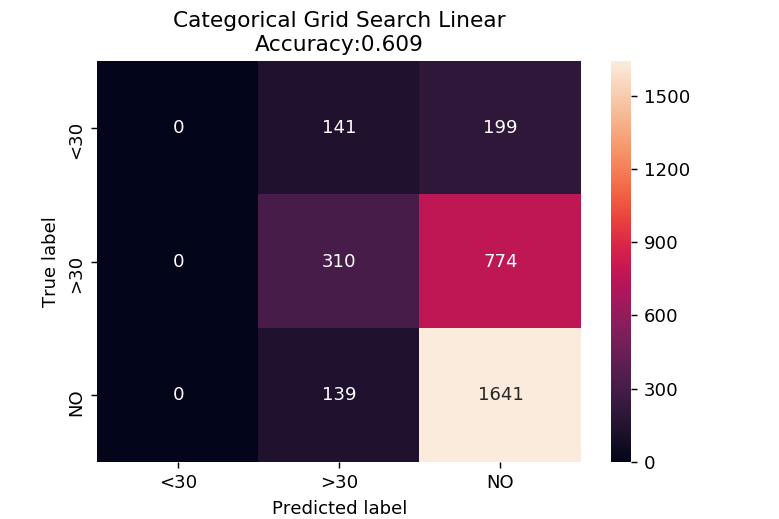

Micro-averaged precision = 0.61 (treat instances equally)
Macro-averaged precision = 0.38 (treat classes equally)
Micro-averaged f1 = 0.61 (treat instances equally)
Macro-averaged f1 = 0.37 (treat classes equally)
             precision    recall  f1-score   support

        <30       0.00      0.00      0.00       340
        >30       0.53      0.29      0.37      1084
         NO       0.63      0.92      0.75      1780

avg / total       0.53      0.61      0.54      3204



/home/lam/anaconda2/envs/my_env3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lam/anaconda2/envs/my_env3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lam/anaconda2/envs/my_env3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [39]:
plot_confusion(grid_clf_acc, 'Categorical Grid Search Linear', X_test,y_test)

In [40]:
# precision recall curve only for binary class

<a id='hot'></a>

## <font color=Orange>One Hot</font>

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    df[X_features], df['readmitted_cat'] , random_state = 0)

In [42]:
X_train.dtypes

time_in_hospital                int64
num_lab_procedures              int64
num_procedures                  int64
num_medications                 int64
number_outpatient               int64
number_emergency                int64
number_inpatient                int64
number_diagnoses                int64
repaglinide_cat                  int8
max_glu_serum_cat                int8
change_cat                       int8
age_cat                          int8
diag_3_cat                      int16
miglitol_cat                     int8
A1Cresult_cat                    int8
diabetesMed_cat                  int8
diag_2_cat                      int16
tolazamide_cat                   int8
glyburide_cat                    int8
gender_cat                       int8
insulin_cat                      int8
race_cat                         int8
admission_source_id_cat          int8
admission_type_id_cat            int8
diag_1_cat                      int16
glipizide_cat                    int8
glyburide-me

In [43]:
X_train.describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,repaglinide_cat,max_glu_serum_cat,...,glimepiride_cat,acarbose_cat,metformin_cat,nateglinide_cat,pioglitazone_cat,chlorpropamide_cat,glipizide-metformin_cat,rosiglitazone_cat,discharge_disposition_id_cat,troglitazone_cat
count,9609.000000,9609.000000,9609.000000,9609.000000,9609.000000,9609.000000,9609.000000,9609.000000,9609.000000,9609.000000,...,9609.000000,9609.000000,9609.000000,9609.000000,9609.000000,9609.000000,9609.000000,9609.000000,9609.000000,9609.0
mean,4.008950,42.990009,1.302113,15.209387,0.318764,0.405661,0.755646,6.955562,1.006556,1.981163,...,1.041107,0.002081,1.229889,0.005932,1.061817,1.000312,0.000104,1.056926,2.821105,0.0
std,2.842911,20.197106,1.634160,7.913883,1.206276,1.528685,1.556468,1.990089,0.088108,0.289921,...,0.216599,0.047806,0.467866,0.082037,0.253879,0.017668,0.010201,0.242253,5.660344,0.0
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0
25%,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,5.000000,1.000000,2.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.0
50%,3.000000,44.000000,1.000000,14.000000,0.000000,0.000000,0.000000,7.000000,1.000000,2.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.0
75%,5.000000,57.000000,2.000000,19.000000,0.000000,0.000000,1.000000,9.000000,1.000000,2.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.0
max,14.000000,109.000000,6.000000,68.000000,37.000000,37.000000,19.000000,16.000000,3.000000,3.000000,...,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,1.000000,3.000000,24.000000,0.0


In [44]:
X_test.describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,repaglinide_cat,max_glu_serum_cat,...,glimepiride_cat,acarbose_cat,metformin_cat,nateglinide_cat,pioglitazone_cat,chlorpropamide_cat,glipizide-metformin_cat,rosiglitazone_cat,discharge_disposition_id_cat,troglitazone_cat
count,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,...,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000
mean,4.017166,43.117353,1.276529,15.175718,0.351748,0.409800,0.754994,6.961298,1.004994,1.980649,...,1.033084,0.002185,1.234082,0.005618,1.063046,1.000312,0.000312,1.053371,3.032147,0.000312
std,2.890015,20.354859,1.656687,7.975925,1.385733,1.730782,1.537609,2.006172,0.078862,0.270751,...,0.195559,0.052963,0.471623,0.086379,0.254381,0.017667,0.017667,0.238290,5.832496,0.017667
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,5.000000,1.000000,2.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,3.000000,44.000000,1.000000,14.000000,0.000000,0.000000,0.000000,7.000000,1.000000,2.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,5.000000,57.000000,2.000000,19.000000,0.000000,0.000000,1.000000,9.000000,1.000000,2.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,14.000000,120.000000,6.000000,61.000000,36.000000,42.000000,14.000000,16.000000,3.000000,3.000000,...,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,1.000000,3.000000,24.000000,1.000000


In [45]:
to_num

['time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses']

### <font color=orange>scale numerical</font>

In [46]:
scaler = MinMaxScaler()
X_train_hot = pd.DataFrame(scaler.fit_transform(X_train[to_num]), columns=to_num)
X_test_hot = pd.DataFrame(scaler.transform(X_test[to_num]), columns = to_num)

In [47]:
from sklearn.preprocessing import OneHotEncoder
hot_features = list(set(X_features) - set(to_num))
hot_features

['max_glu_serum_cat',
 'A1Cresult_cat',
 'glimepiride_cat',
 'chlorpropamide_cat',
 'age_cat',
 'glipizide-metformin_cat',
 'pioglitazone_cat',
 'change_cat',
 'gender_cat',
 'admission_type_id_cat',
 'metformin_cat',
 'admission_source_id_cat',
 'tolazamide_cat',
 'troglitazone_cat',
 'repaglinide_cat',
 'miglitol_cat',
 'diag_3_cat',
 'diag_1_cat',
 'nateglinide_cat',
 'glyburide-metformin_cat',
 'glyburide_cat',
 'acarbose_cat',
 'race_cat',
 'rosiglitazone_cat',
 'diag_2_cat',
 'insulin_cat',
 'diabetesMed_cat',
 'glipizide_cat',
 'discharge_disposition_id_cat']

In [48]:
enc = OneHotEncoder()
enc.fit(df[hot_features])
enc.n_values_

array([  4,   4,   4,   3,   5,   2,   4,   2,   2,   8,   4,  12,   2,
         2,   4,   2, 790, 711,   4,   3,   4,   3,   6,   4, 725,   4,
         2,   4,  25])

In [49]:
enc.feature_indices_

array([   0,    4,    8,   12,   15,   20,   22,   26,   28,   30,   38,
         42,   54,   56,   58,   62,   64,  854, 1565, 1569, 1572, 1576,
       1579, 1585, 1589, 2314, 2318, 2320, 2324, 2349])

### <font color=orange> convert to one hot </font>

In [50]:
X_train_hot = pd.concat([X_train_hot, \
                         pd.DataFrame(enc.transform(X_train[hot_features]).toarray())], axis=1)

X_test_hot = pd.concat([X_test_hot, \
                         pd.DataFrame(enc.transform(X_test[hot_features]).toarray())], axis=1)

In [51]:
X_train_hot.head(2)

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,0,1,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
0,0.538462,0.629630,0.000000,0.313433,0.000000,0.0,0.105263,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.153846,0.574074,0.166667,0.208955,0.054054,0.0,0.157895,0.307692,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
X_test_hot.head(2)

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,0,1,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
0,0.230769,0.555556,0.166667,0.089552,0.0,0.0,0.052632,0.307692,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.076923,0.342593,0.000000,0.149254,0.0,0.0,0.000000,0.461538,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### <font color=orange> SVM one hot</font>

train accuracy: 0.55
test accuracy: 0.56


<IPython.core.display.Javascript object>


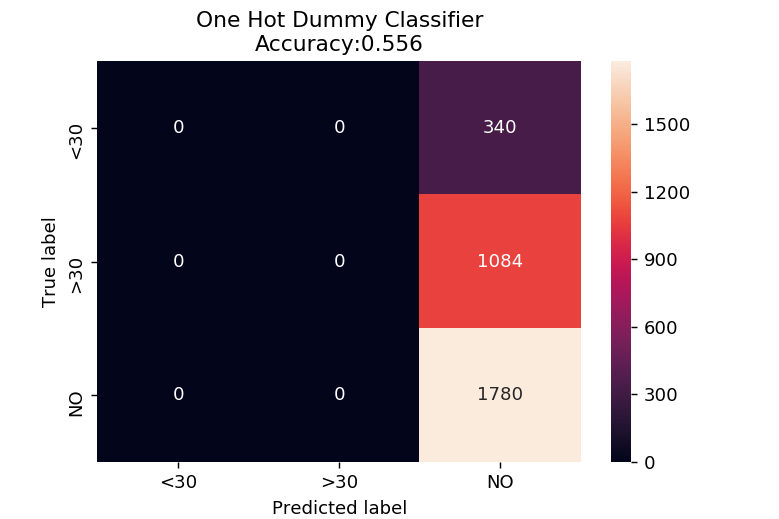

Micro-averaged precision = 0.56 (treat instances equally)
Macro-averaged precision = 0.19 (treat classes equally)
Micro-averaged f1 = 0.56 (treat instances equally)
Macro-averaged f1 = 0.24 (treat classes equally)
             precision    recall  f1-score   support

        <30       0.00      0.00      0.00       340
        >30       0.00      0.00      0.00      1084
         NO       0.56      1.00      0.71      1780

avg / total       0.31      0.56      0.40      3204

CPU times: user 73.3 ms, sys: 108 ms, total: 181 ms
Wall time: 179 ms


/home/lam/anaconda2/envs/my_env3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lam/anaconda2/envs/my_env3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lam/anaconda2/envs/my_env3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [53]:
%%time
from sklearn.dummy import DummyClassifier

d_major = DummyClassifier(strategy='most_frequent').fit(X_train_hot, y_train)

print('train accuracy: {:.2f}'.format(d_major.score(X_train_hot, y_train)))
print('test accuracy: {:.2f}'.format(d_major.score(X_test_hot, y_test)))
plot_confusion(d_major, 'One Hot Dummy Classifier', X_test_hot, y_test)

[LibLinear]training accuracy: 0.68
test accuracy: 0.58


/home/lam/anaconda2/envs/my_env3/lib/python3.6/site-packages/sklearn/svm/base.py:898: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


<IPython.core.display.Javascript object>


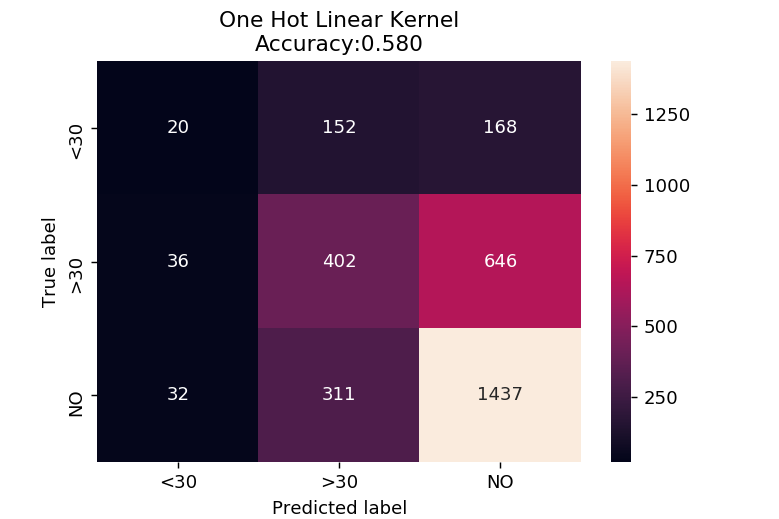

Micro-averaged precision = 0.58 (treat instances equally)
Macro-averaged precision = 0.44 (treat classes equally)
Micro-averaged f1 = 0.58 (treat instances equally)
Macro-averaged f1 = 0.41 (treat classes equally)
             precision    recall  f1-score   support

        <30       0.23      0.06      0.09       340
        >30       0.46      0.37      0.41      1084
         NO       0.64      0.81      0.71      1780

avg / total       0.54      0.58      0.55      3204

CPU times: user 2.93 s, sys: 60 ms, total: 2.99 s
Wall time: 2.7 s


In [54]:
%%time
clf = LinearSVC(verbose=True).fit(X_train_hot, y_train)

print('training accuracy: {:.2f}'.format(clf.score(X_train_hot, y_train)))
print('test accuracy: {:.2f}'.format(clf.score(X_test_hot, y_test)))
plot_confusion(clf, 'One Hot Linear Kernel', X_test_hot, y_test )

### <font color=orange>SVM optimise over accuracy</font>

In [55]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

clf = SVC() 

grid_values = [
  {'C': [0.1, 1, 10, 100, 1000], 'kernel':['linear', 'sigmoid']}, 
    {'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.001, 0.01, 0.05, 0.1, 1, 10, 100], 'kernel':['rbf']},
    {'C': [0.1, 1, 10, 100, 1000], 'degree':[2, 3, 4, 5], 'kernel': ['poly']}
 ]

grid_clf_acc = GridSearchCV(clf, param_grid = grid_values, n_jobs= -1 )
grid_clf_acc.fit(X_train_hot, y_train)
y_decision_fn_scores_acc = grid_clf_acc.decision_function(X_test_hot) 

print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)

Grid best parameter (max. accuracy):  {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Grid best score (accuracy):  0.5948589863669477
CPU times: user 3min 37s, sys: 4.11 s, total: 3min 41s
Wall time: 3h 42min 50s


In [56]:
pd.DataFrame(grid_clf_acc.cv_results_).sort_values(by=['mean_test_score'], ascending=False).iloc[:,2:8]

/home/lam/anaconda2/envs/my_env3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/lam/anaconda2/envs/my_env3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/lam/anaconda2/envs/my_env3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/ho

,mean_test_score,mean_train_score,param_C,param_degree,param_gamma,param_kernel
31,0.594859,0.646529,100,NaN,0.001,rbf
25,0.593922,0.669268,10,NaN,0.01,rbf
9,0.590800,0.674784,1000,NaN,NaN,sigmoid
0,0.590696,0.620980,0.1,NaN,NaN,linear
20,0.587574,0.737433,1,NaN,0.1,rbf
19,0.587262,0.648870,1,NaN,0.05,rbf
2,0.585493,0.690915,1,NaN,NaN,linear
7,0.585285,0.607191,100,NaN,NaN,sigmoid
38,0.576959,0.734468,1000,NaN,0.001,rbf
4,0.567281,0.717817,10,NaN,NaN,linear


<IPython.core.display.Javascript object>


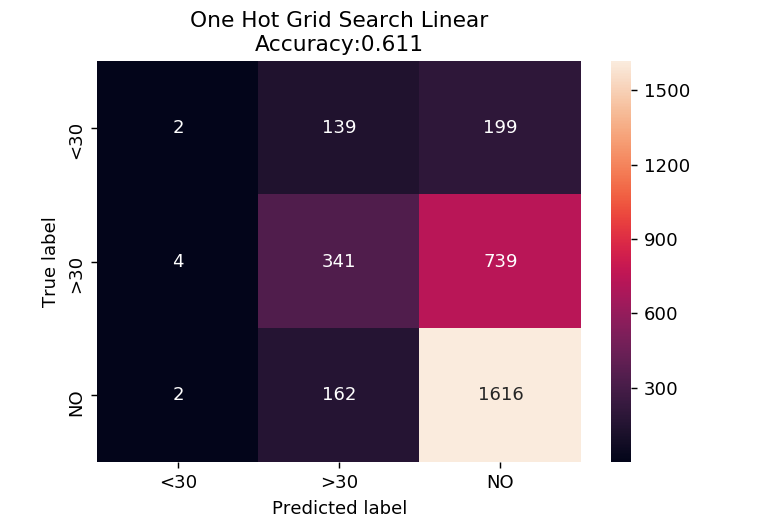

Micro-averaged precision = 0.61 (treat instances equally)
Macro-averaged precision = 0.47 (treat classes equally)
Micro-averaged f1 = 0.61 (treat instances equally)
Macro-averaged f1 = 0.38 (treat classes equally)
             precision    recall  f1-score   support

        <30       0.25      0.01      0.01       340
        >30       0.53      0.31      0.40      1084
         NO       0.63      0.91      0.75      1780

avg / total       0.56      0.61      0.55      3204



In [57]:
plot_confusion(grid_clf_acc, 'One Hot Grid Search Linear', X_test_hot, y_test)